In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# We plan to predict the Carbon dioxide from phenological factors NDVI and EVI.
# NDVI and EVI are independent variables. Carbon dioxide is dependent variable.
# To predict Carbon dioxide values, we will use Machine Learning techniques.
# To train our model, we will use the data available from Jan 2010 to August 2019.
# The frequency of data is 32 days.

In [3]:
# reading the training data stored in csv file

data = pd.read_csv('data_comb.csv')

In [4]:
# Missing values are replaced by the mean of the respective parameter/ variable.

In [5]:
# We have NDVI, EVI, and Carbon Dioxide data for 4 coordinates in Gujarat, India.
# We will predict Carbon Dioxide of each coordinate using NDVI and EVI of all the points.
# This means we have 4 dependent variables and 8 independent variables.

In [6]:
# Let us start with basic plotting of our variables in Training set.
# This will give us an idea about the kind and range of data we are dealing with.

In [7]:
# X is the collection of independent variables.

X = data[['ndvi_21N/70.5E', 'ndvi_23N/70.5E', 'ndvi_21N/73.5E', 'ndvi_23N/73.5E', 'evi_21N/70.5E', 'evi_23N/70.5E', 'evi_21N/73.5E', 'evi_23N/73.5E']]

In [8]:
# These represent the dependent variables.

Y1 = data['co2_21N/70.5E']
Y2 = data['co2_23N/70.5E']
Y3 = data['co2_21N/73.5E']
Y4 = data['co2_23N/73.5E']

Text(0, 0.5, 'Carbon Dioxide (micromoles per mole)')

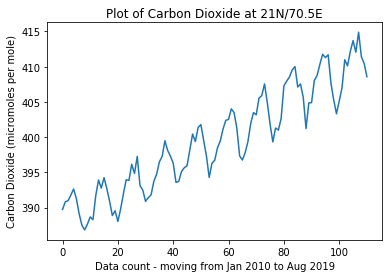

In [9]:
Y1.plot.line(title='Plot of Carbon Dioxide at 21N/70.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')

Text(0, 0.5, 'Carbon Dioxide (micromoles per mole)')

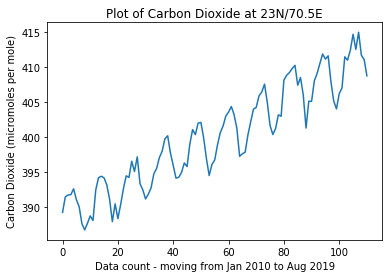

In [10]:
Y2.plot.line(title='Plot of Carbon Dioxide at 23N/70.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')

Text(0, 0.5, 'Carbon Dioxide (micromoles per mole)')

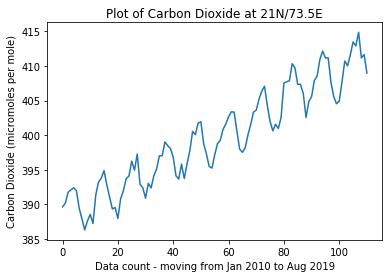

In [11]:
Y3.plot.line(title='Plot of Carbon Dioxide at 21N/73.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')

Text(0, 0.5, 'Carbon Dioxide (micromoles per mole)')

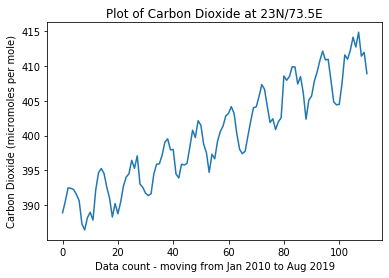

In [12]:
Y4.plot.line(title='Plot of Carbon Dioxide at 23N/73.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')

In [13]:
# We can see that the amount of carbon dioxide is increasing over the years.

Text(0, 0.5, 'NDVI')

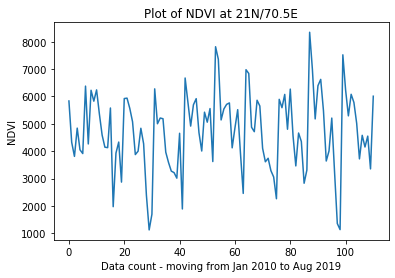

In [14]:
X['ndvi_21N/70.5E'].plot.line(title='Plot of NDVI at 21N/70.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('NDVI')

Text(0, 0.5, 'NDVI')

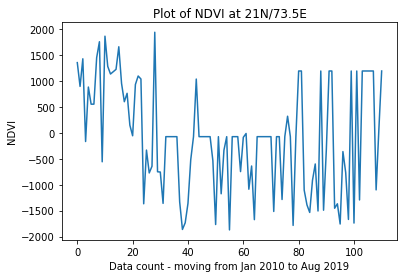

In [15]:
X['ndvi_23N/70.5E'].plot.line(title='Plot of NDVI at 21N/73.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('NDVI')

Text(0, 0.5, 'NDVI')

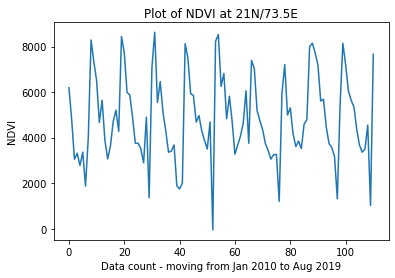

In [16]:
X['ndvi_21N/73.5E'].plot.line(title='Plot of NDVI at 21N/73.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('NDVI')

Text(0, 0.5, 'NDVI')

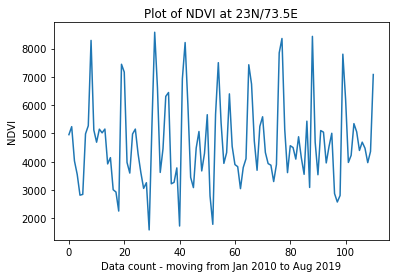

In [17]:
X['ndvi_23N/73.5E'].plot.line(title='Plot of NDVI at 23N/73.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('NDVI')

Text(0, 0.5, 'EVI')

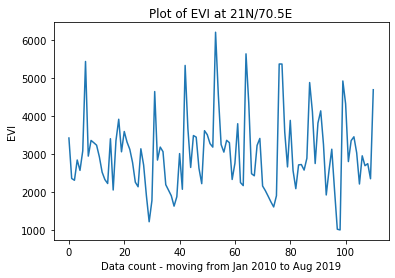

In [18]:
X['evi_21N/70.5E'].plot.line(title='Plot of EVI at 21N/70.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('EVI')

Text(0, 0.5, 'EVI')

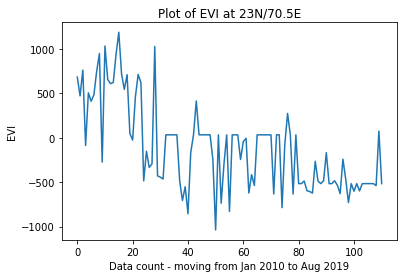

In [19]:
X['evi_23N/70.5E'].plot.line(title='Plot of EVI at 23N/70.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('EVI')

Text(0, 0.5, 'EVI')

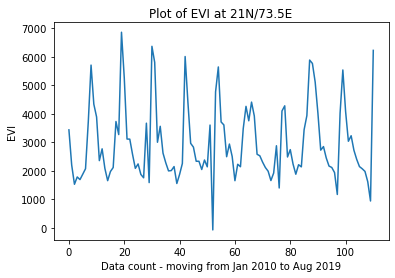

In [20]:
X['evi_21N/73.5E'].plot.line(title='Plot of EVI at 21N/73.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('EVI')

Text(0, 0.5, 'EVI')

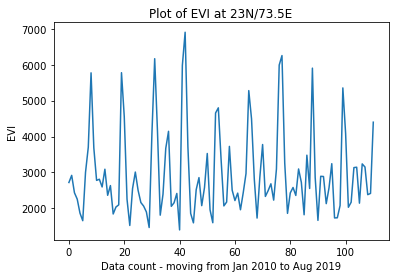

In [21]:
X['evi_23N/73.5E'].plot.line(title='Plot of EVI at 23N/73.5E')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('EVI')

In [22]:
# Let's briefly describe our data

In [23]:
data.describe()

,date,co2_21N/70.5E,co2_23N/70.5E,co2_21N/73.5E,co2_23N/73.5E,ndvi_21N/70.5E,ndvi_23N/70.5E,ndvi_21N/73.5E,ndvi_23N/73.5E,evi_21N/70.5E,evi_23N/70.5E,evi_21N/73.5E,evi_23N/73.5E
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.00000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,41939.432432,399.645766,399.995946,399.745045,399.976757,4729.477477,-79.19991,4829.207207,4673.963964,3017.252252,-104.587477,2967.549550,2959.819820
std,1027.897418,7.294118,7.334162,7.277308,7.279411,1433.003425,1028.13907,1871.647666,1532.264913,992.627573,489.519926,1327.542499,1209.434174
min,40187.000000,386.840000,386.720000,386.300000,386.440000,1127.000000,-1872.00000,-53.000000,1587.000000,1015.000000,-1038.000000,-77.000000,1399.000000
25%,41061.000000,393.735000,394.190000,393.725000,394.485000,3896.500000,-768.50000,3542.000000,3647.500000,2290.500000,-516.470000,2077.000000,2137.500000
50%,41936.000000,399.370000,400.150000,399.010000,399.520000,4839.000000,-73.12000,4683.000000,4456.000000,2931.000000,-87.000000,2503.000000,2579.000000
75%,42824.000000,405.420000,405.910000,405.565000,405.620000,5772.500000,942.50000,5971.000000,5258.500000,3417.500000,33.150000,3717.500000,3308.500000
max,43698.000000,414.890000,414.930000,414.870000,414.830000,8345.000000,1941.00000,8627.000000,8580.000000,6195.000000,1189.000000,6866.000000,6906.000000


In [24]:
# Let's start with Machine Learning models.

In [25]:
# We will develop Multi-variate Polynomial Regression Models of different degrees.
# What is Polynomial Regression?
# Polynomial Regression is a machine learning method in which the dependent variable is represented as a polynomial function of independent variables.
# The degree of Polynomial Regression is the highest degree of the individual terms of the polynomial.
# A + B*X has degree 1.
# A + B*X + C*X^2 has degree 2.

In [26]:
# Polynomial Regression with degree 1
# Also known as Linear Regression

In [27]:
# X_new are the new parameters formed by the different linear combinations of our original parameters in X.
# The number of new parameters depend on the degree.
# Now we apply the usual multi-variate Ridge Regression assuming these new parameters as separate parameters.
# Ridge Regression is Linear Regression with the parameters regularized.
# This helps us reduce the chances of overfitting.
# Here, we take the default value of regularization paramter 'alpha' = 0.5

poly = PolynomialFeatures(degree=1)
X_new = poly.fit_transform(X)

In [28]:
r1 = Ridge()
r2 = Ridge()
r3 = Ridge()
r4 = Ridge()

In [29]:
# r1_pred, r2_pred, etc. contain the predicted values

In [30]:
r1.fit(X_new, Y1)
r1_pred = r1.predict(X_new)

In [31]:
r2.fit(X_new, Y2)
r2_pred = r2.predict(X_new)

In [32]:
r3.fit(X_new, Y3)
r3_pred = r3.predict(X_new)

In [33]:
r4.fit(X_new, Y4)
r4_pred = r4.predict(X_new)

In [34]:
# Now that we have the predicted values, let's plot them with the actual values.
# This will give us a qualitative idea about the performance of the model.

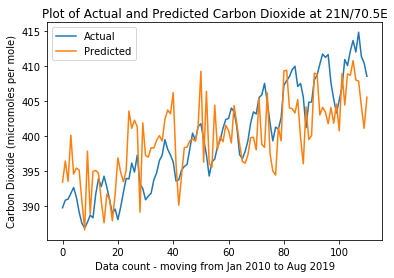

In [35]:
l1 = Y1.values.tolist()
l2 = r1_pred.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')
plt.title('Plot of Actual and Predicted Carbon Dioxide at 21N/70.5E')
plt.legend()
plt.show()

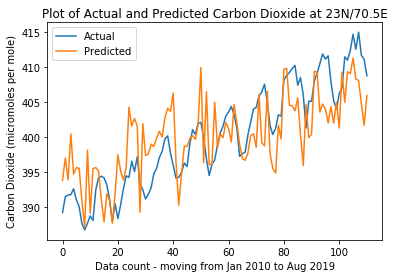

In [36]:
l1 = Y2.values.tolist()
l2 = r2_pred.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')
plt.title('Plot of Actual and Predicted Carbon Dioxide at 23N/70.5E')
plt.legend()
plt.show()

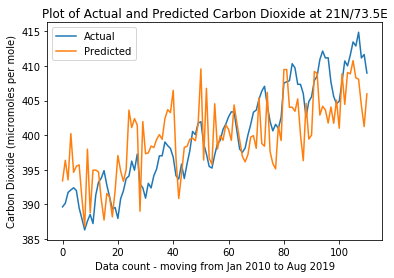

In [37]:
l1 = Y3.values.tolist()
l2 = r3_pred.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')
plt.title('Plot of Actual and Predicted Carbon Dioxide at 21N/73.5E')
plt.legend()
plt.show()

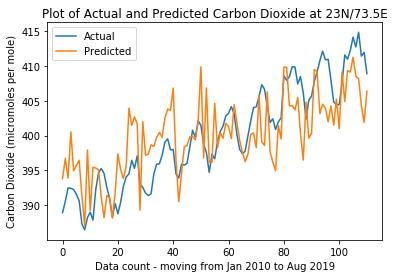

In [38]:
l1 = Y4.values.tolist()
l2 = r4_pred.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')
plt.title('Plot of Actual and Predicted Carbon Dioxide at 23N/73.5E')
plt.legend()
plt.show()

In [39]:
# Let us now evaluate our model quantitatively.

In [40]:
# For this, we calculate R^2 (R-squared) and MSE (Mean Squared Error) for each model
# R^2 is a measure of how close the data is to the fitted regression curve.
# Higher the R^2, better is the model.
# MSE is the mean of the squares of errors, i.e., the difference between the actual value and predicted value.
# Lower the MSE, better is the model.

In [41]:
# For 21N/70.5E

print("The R-squared = ",r1.score(X_new, Y1))
print("MSE = ",mean_squared_error(Y1, r1_pred))

The R-squared =  0.5491830830818207
MSE =  23.769249285454624


In [42]:
# For 23N/70.5E

print("The R-squared = ",r1.score(X_new, Y2))
print("MSE = ",mean_squared_error(Y2, r2_pred))

The R-squared =  0.5461576010145366
MSE =  24.0400325426349


In [43]:
# For 21N/73.5E

print("The R-squared = ",r3.score(X_new, Y3))
print("MSE = ",mean_squared_error(Y3, r3_pred))

The R-squared =  0.5472985949744378
MSE =  23.75871908229641


In [44]:
# For 23N/73.5E

print("The R-squared = ",r1.score(X_new, Y4))
print("MSE = ",mean_squared_error(Y4, r4_pred))

The R-squared =  0.5468718866939623
MSE =  23.62599137310114


In [ ]:
'''To determine which degree will give us the best results, we do the R-squared Test. 
In this, we plot the R-squared values for different degrees of Polynomial Regression.
Whichever degree gives the highest value, will fit our data the best.
For practical purposes, we will consider the maximum degree to be 12.

test_lr = LinearRegression()
Rsqu_test = []       # to store the R-squared values of different models
degree = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Creating Rsqu_test

for n in degree:
    poly = PolynomialFeatures(degree=n)
    new_X = poly.fit_transform(X)
    test_lr.fit(new_X, Y1)
    
    Rsqu_test.append(test_lr.score(new_X, Y1))

# Plotting Rsqu_test

plt.plot(degree, Rsqu_test)
plt.xlabel('Degree of Polynomial Regression')
plt.ylabel('R^2 value')
plt.title('R^2 Values for different degrees of Polynomial Regression')'''

#For simplicity, this graph is not included in the final results.

In [45]:
# Increasing the degree, from here onwards, leads to overfitting.
# Overfitting gives very low results on testing.
# Overfitted models give high accuracy on training set but low results on testing set.

In [46]:
# We now test our model.

In [47]:
# reading the testing data stored in csv file

data_test = pd.read_csv('data_comb_test.csv')

In [48]:
X_test = data_test[['ndvi_21N/70.5E', 'ndvi_23N/70.5E', 'ndvi_21N/73.5E', 'ndvi_23N/73.5E', 'evi_21N/70.5E', 'evi_23N/70.5E', 'evi_21N/73.5E', 'evi_23N/73.5E']]

In [49]:
Y1_test = data_test['co2_21N/70.5E']
Y2_test = data_test['co2_23N/70.5E']
Y3_test = data_test['co2_21N/73.5E']
Y4_test = data_test['co2_23N/73.5E']

In [50]:
# To test our model, we will use the data available from Jan 2010 to August 2019.
# The frequency of data is 32 days.
# The testing set contains data of 16 days after each day in the training set.
# For example, if January 9, 2010 is in Training set, then January 25, 2010 is in Testing set.

In [51]:
poly_test = PolynomialFeatures(degree=1)
X_new_test = poly_test.fit_transform(X_test)

In [52]:
r1_pred_test = r1.predict(X_new_test)

In [53]:
r2_pred_test = r2.predict(X_new_test)

In [54]:
r3_pred_test = r3.predict(X_new_test)

In [55]:
r4_pred_test = r4.predict(X_new_test)

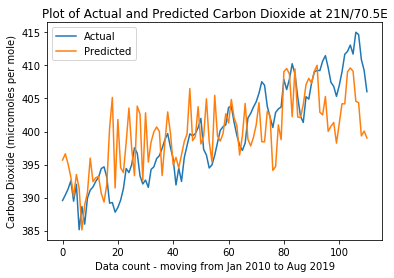

In [56]:
l1 = Y1_test.values.tolist()
l2 = r1_pred_test.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')
plt.title('Plot of Actual and Predicted Carbon Dioxide at 21N/70.5E')
plt.legend()
plt.show()

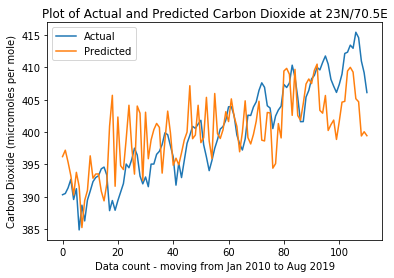

In [57]:
l1 = Y2_test.values.tolist()
l2 = r2_pred_test.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')
plt.title('Plot of Actual and Predicted Carbon Dioxide at 23N/70.5E')
plt.legend()
plt.show()

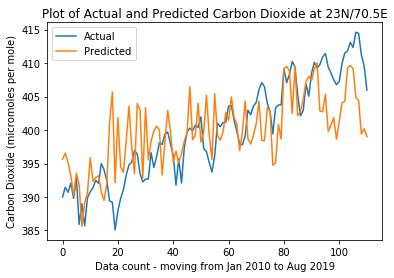

In [58]:
l1 = Y3_test.values.tolist()
l2 = r3_pred_test.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')
plt.title('Plot of Actual and Predicted Carbon Dioxide at 23N/70.5E')
plt.legend()
plt.show()

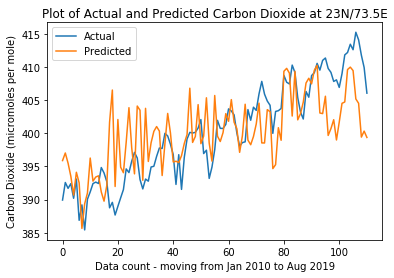

In [59]:
l1 = Y4_test.values.tolist()
l2 = r4_pred_test.tolist()
plt.plot(l1, label='Actual')
plt.plot(l2, label='Predicted')
plt.xlabel('Data count - moving from Jan 2010 to Aug 2019')
plt.ylabel('Carbon Dioxide (micromoles per mole)')
plt.title('Plot of Actual and Predicted Carbon Dioxide at 23N/73.5E')
plt.legend()
plt.show()

In [60]:
# For 21N/70.5E

print("The R-squared = ",r1.score(X_new_test, Y1_test))
print("MSE = ",mean_squared_error(Y1_test, r1_pred_test))

The R-squared =  0.4629311681567001
MSE =  28.292830740959005


In [61]:
# For 23N/70.5E

print("The R-squared = ",r2.score(X_new_test, Y2_test))
print("MSE = ",mean_squared_error(Y2_test, r2_pred_test))

The R-squared =  0.46385098681558146
MSE =  28.56335406432395


In [62]:
# For 21N/73.5E

print("The R-squared = ",r3.score(X_new_test, Y3_test))
print("MSE = ",mean_squared_error(Y3_test, r3_pred_test))

The R-squared =  0.47506064753501126
MSE =  28.51990504345819


In [63]:
# For 23N/73.5E

print("The R-squared = ",r4.score(X_new_test, Y4_test))
print("MSE = ",mean_squared_error(Y4_test, r4_pred_test))

The R-squared =  0.46002282292190605
MSE =  28.754157505140622
